# Análise de Dados de Pacientes de Doenças Cardíacas

- Fonte: *Heart Disease Data Set* - Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)
- Objetivo: Explorar as conexões entre doenças cardíacas e outras condições e características dos pacientes.

> Este notebook depende do *dataset* mantido pelo usuário *ronit* na plataforma kaggle. Baixe o dataset no site indicado acima (requer *login*) e o desempacote na mesma pasta que este notebook.

## Importando as bibliotecas e acessando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    OneHotEncoder,
    scale
)

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Segundo informações fornecidas pelo mantenedor do dataset, as colunas referem-se a:

- age: idade em anos;
- sex: sexo. 
    - 0: feminino
    - 1: masculino
- cp: tipo de dor no peito.
    - 0: angina típica
    - 1: angina atípica
    - 2: dor não anginosa
    - 3: assintomático
- trestbps: pressão sanguínea em repouso. Em mmHg.
- chol: colesterol sérico em mg/dl.
- fbs: nível de açucar no sangue.
    - 0: menor que 120 mg/dl
    - 1: maior que 120 mg/dl
- restecg: resultados eletrocardiográficos em repouso.
    - 0: normal
    - 1: tendo anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV)
    - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios Estes.
- thalach: frequência cardíaca máxima alcançada.
- exang: presença de angina induzida por exercício.
    - 0: não
    - 1: sim
- oldpeak: depressão de ST induzida por exercício em relação ao repouso.
- slope: inclinação do segmento ST no pico do esforço.
    - 0: subida
    - 1: plano
    - 2: descida
- ca: número de vasos principais (0-3) coloridos por fluorosopia.
- thal: resultado do teste de estresse.
    - 3: normal
    - 6: defeito fixo
    - 7: defeito reversível
- target: presença/ausência de condição cardíaca.
    - 0: ausência
    - 1: presença

## Análise Univariada

In [2]:
data.shape

(303, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observações iniciais:
- O *dataset* não apresenta dados faltantes.
- Segundo o dicionário apresentado (e observação dos dados), variáveis categóricas estão representadas de forma numérica.
- O *dataset* se encontra ligeiramente desbalanceado (o número de pacientes com condições cardíacas é um pouco maior que o de pacientes que não apresentam estas condições).
- A faixa de idade dos pacientes é entre 29 e 77 anos, sendo que a maioria (75%) possui idade superior a 47 anos.
- A maioria dos pacientes são do sexo masculino.
- A maioria dos pacientes (cerca de 75%) não apresenta pressão alta em repouso (igual ou acima de 140mmHg, segundo heart.org).
- A maioria dos pacientes (acima de 75%) apresenta colesterol alto (acima de 200mg/dl, segundo medlineplus.gov).
- O nível de açucar no sangue da maioria dos pacientes se encontra abaixo de 120mg/dl.
- A maioria dos pacientes não apresentou angina no teste de estresse.

In [5]:
# Seaborn configurations
fig_dims = (10, 6)

sns.set_theme(
    palette='hot',
    style='whitegrid',
    font_scale=1.2,
    rc={'figure.figsize':fig_dims}
)

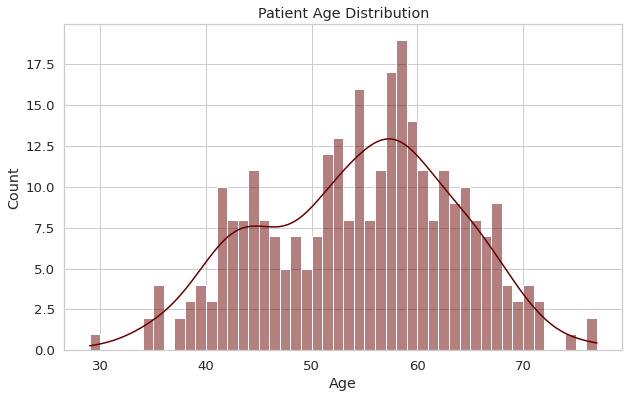

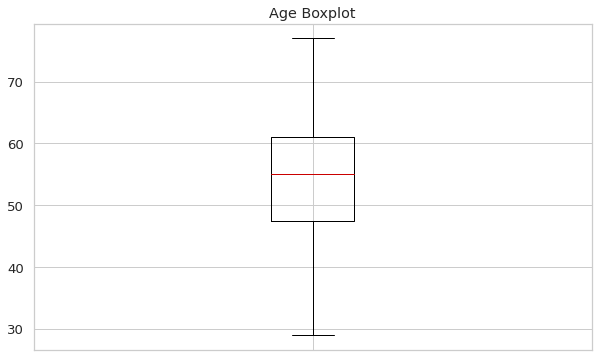

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


In [6]:
# Age
age_plt = sns.histplot(
    data=data,
    x='age',
    kde=True,
    binwidth=1
)
age_plt.set(title='Patient Age Distribution', xlabel='Age')
plt.show()

plt.title("Age Boxplot")
plt.boxplot(data['age'], labels=[''])
plt.show()

print(data['age'].describe())

O gráfico da distribuição das idades dos pacientes, acima, demonstra que a maioria dos pacientes encontra-se, aproximadamente, entre 50 e 65 anos (esta observação é compatível com o observado nos quartis da variável, em que 50% dos pacientes encontram-se entre 47 e 61 anos).

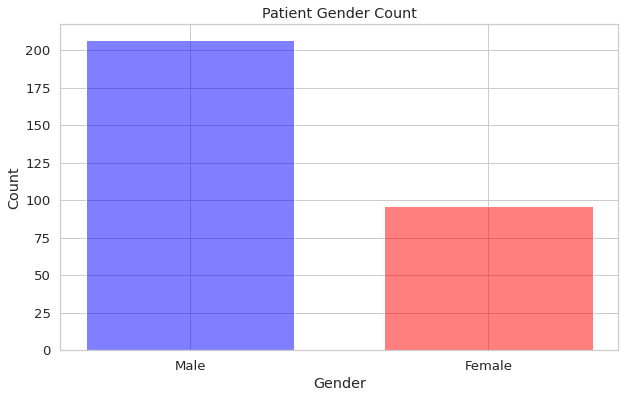

In [7]:
# Gender
aux = data.copy()
aux.loc[aux['sex'] == 0, 'sex'] = 'Female'
aux.loc[aux['sex'] == 1, 'sex'] = 'Male'

gender_plt = sns.histplot(
    data=aux,
    x='sex',
    hue='sex',
    palette=['b','r'],
    legend=False,
    shrink=.7
)
gender_plt.set(title='Patient Gender Count', xlabel='Gender')
plt.show()

O número de pacientes homens é mais que o dobro do número de pacientes mulheres.

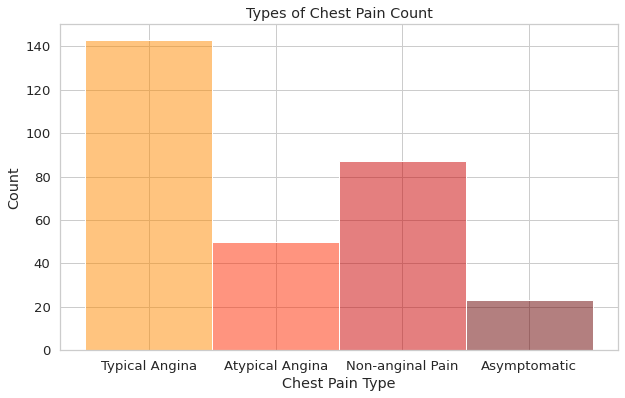

Typical Angina      47.194719
Non-anginal Pain    28.712871
Atypical Angina     16.501650
Asymptomatic         7.590759
Name: cp, dtype: float64


In [8]:
# Chest Pain
aux = data.copy()
aux.loc[aux['cp'] == 0, 'cp'] = 'Typical Angina'
aux.loc[aux['cp'] == 1, 'cp'] = 'Atypical Angina'
aux.loc[aux['cp'] == 2, 'cp'] = 'Non-anginal Pain'
aux.loc[aux['cp'] == 3, 'cp'] = 'Asymptomatic'

chest_pain_plt = sns.histplot(
    data=aux,
    x='cp',
    hue='cp',
    legend=False
)
chest_pain_plt.set(title='Types of Chest Pain Count', xlabel='Chest Pain Type')
chest_pain_plt.invert_xaxis()
plt.show()

print((aux['cp'].value_counts()/len(aux['cp']))*100)

Aproximadamente metade (47%) dos pacientes apresentou angina típica. \
Mais de um quarto dos pacientes (28.7%) apresentou dor não anginosa. \
16.5% apresentou angina atípica e apenas 7.6% se apresentou assintomático.

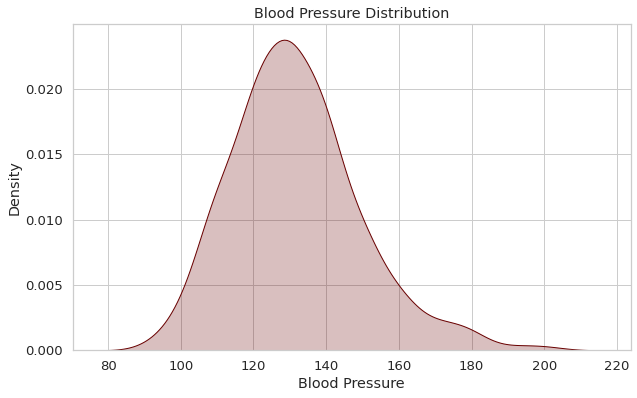

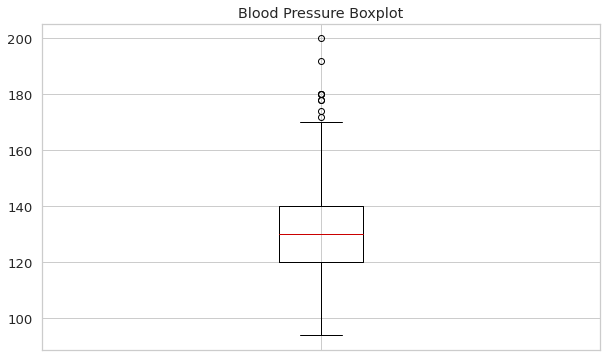

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


In [9]:
# Blood Pressure
blood_pressure_plt = sns.kdeplot(
    data=data['trestbps'],
    shade=True
)
blood_pressure_plt.set(title='Blood Pressure Distribution', xlabel='Blood Pressure')
plt.show()

plt.title("Blood Pressure Boxplot")
plt.boxplot(data['trestbps'], labels=[''])
plt.show()

print(data['trestbps'].describe())

A maioria dos pacientes não apresenta pressão alta em repouso (acima de 140mmHg, segundo heart.org). \
A variável apresenta alguns *outliers* no extremo superior (aprox. acima de 170mmHg). Neste caso é importante manter os *outliers*, dado a hipótese de que, quanto mais alta a pressão sanguínea, maior o risco de doenças cardíacas. Os *outliers*, portanto, permitem observar os "casos extremos" de pressão alta e sua relação com a ocorrência de condições cardíacas.

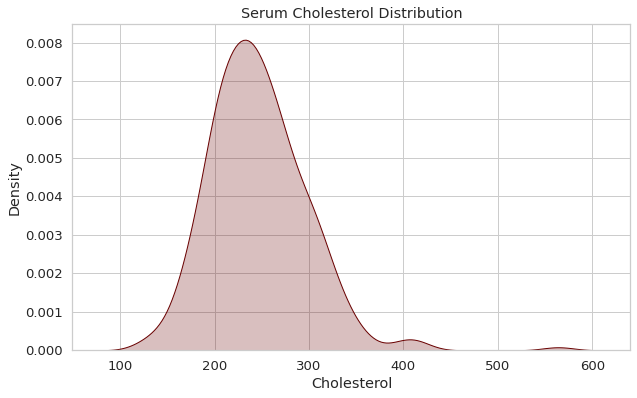

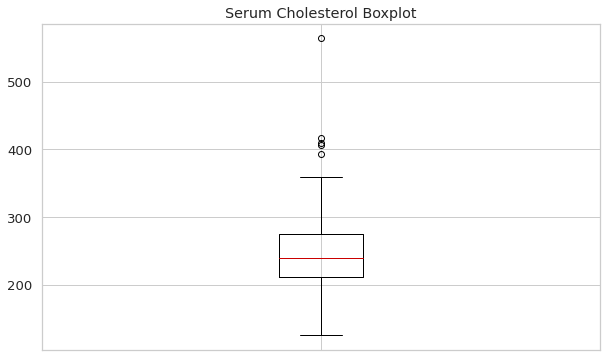

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


In [10]:
# Cholesterol
cholesterol_plt = sns.kdeplot(
    data=data['chol'],
    shade=True
)
cholesterol_plt.set(title='Serum Cholesterol Distribution', xlabel='Cholesterol')
plt.show()

plt.title("Serum Cholesterol Boxplot")
plt.boxplot(data['chol'], labels=[''])
plt.show()

print(data['chol'].describe())

A distribuição do colesterol sérico é semelhante à da pressão sanguínea, o que faz sentido, dado a hipótese de que colesterol alto resulta em aumento da pressão. \
A grande maioria (acima de 75%) dos pacientes apresenta colesterol alto (acima de 200mg/dl, segundo medlineplus.gov), com alguns casos extremos (*outliers*) apresentando colesterol sérico acima de 400mg/dl. \
Semelhante ao caso da pressão sanguínea, é interessante manter os *outliers* do colesterol sérico de modo a observar a influência de níveis extremos na ocorrência de doênças cardíacas.

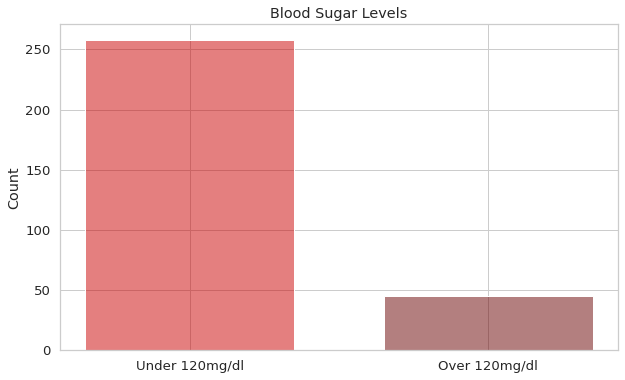

Under 120mg/dl    85.148515
Over 120mg/dl     14.851485
Name: fbs, dtype: float64


In [11]:
# Blood Sugar
aux = data.copy()
aux.loc[aux['fbs'] == 0, 'fbs'] = 'Under 120mg/dl'
aux.loc[aux['fbs'] == 1, 'fbs'] = 'Over 120mg/dl'

blood_sugar_plt = sns.histplot(
    data=aux,
    x='fbs',
    hue='fbs',
    legend=False,
    shrink=.7
)
blood_sugar_plt.set(title='Blood Sugar Levels', xlabel='')
blood_sugar_plt.invert_xaxis()
plt.show()

print((aux['fbs'].value_counts()/len(aux['fbs']))*100)

Cerca de 15% dos pacientes apresentaram nível alto de açucar no sangue. (o valor limite, 120mg/dl, foi apresentado no dicionário do data set).

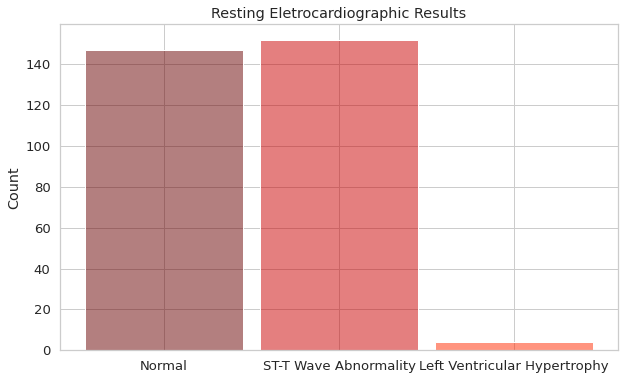

ST-T Wave Abnormality           50.165017
Normal                          48.514851
Left Ventricular Hypertrophy     1.320132
Name: restecg, dtype: float64


In [12]:
# Electrocardiographic Results
aux = data.copy()
aux.loc[aux['restecg'] == 0, 'restecg'] = 'Normal'
aux.loc[aux['restecg'] == 1, 'restecg'] = 'ST-T Wave Abnormality'
aux.loc[aux['restecg'] == 2, 'restecg'] = 'Left Ventricular Hypertrophy'

ecg_plt = sns.histplot(
    data=aux,
    x='restecg',
    hue='restecg',
    legend=False,
    shrink=.9
)
ecg_plt.set(title='Resting Eletrocardiographic Results', xlabel='')
plt.show()

print((aux['restecg'].value_counts()/len(aux['restecg']))*100)

Poucos pacientes (menos de 1.5%) apresentaram, nos resultados eletrocardiográficos, hipertrofia ventricular esquerda provável ou definitiva pelos critérios Estes. \
Entre os pacientes restantes, aproximadamente metade apresentou anormalidade da onda ST-T. 

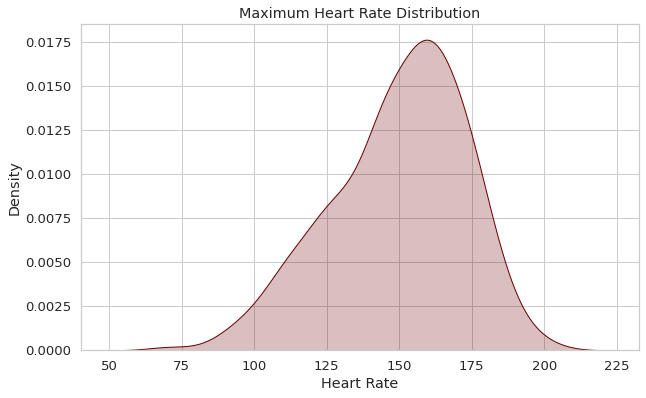

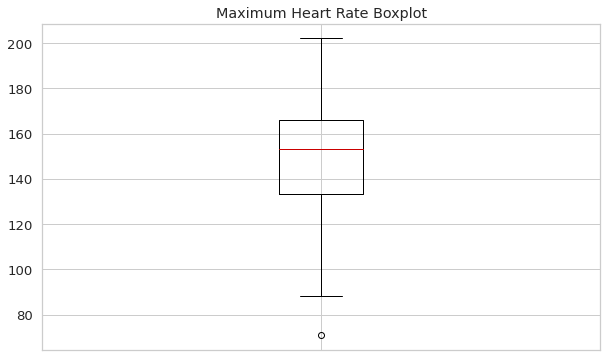

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


In [13]:
# Heart Rate
heart_rate_plt = sns.kdeplot(
    data=data['thalach'],
    shade=True
)
heart_rate_plt.set(title='Maximum Heart Rate Distribution', xlabel='Heart Rate')
plt.show()

plt.title("Maximum Heart Rate Boxplot")
plt.boxplot(data['thalach'], labels=[''])
plt.show()

print(data['thalach'].describe())

A maioria dos pacientes apresentou frequência cardíaca máxima, no teste de estresse, entre 130 e 175, de acordo com o gráfico de distribuição. \
A variável apresenta um *outlier* no extremo inferior. A remoção deste *outlier* fica sujeita a análises e resultados futuros já que pode, ou não, os afetar significantemente. Ele não aparenta ser erro no registro, portanto, de imediato, a recomendação é mantê-lo.

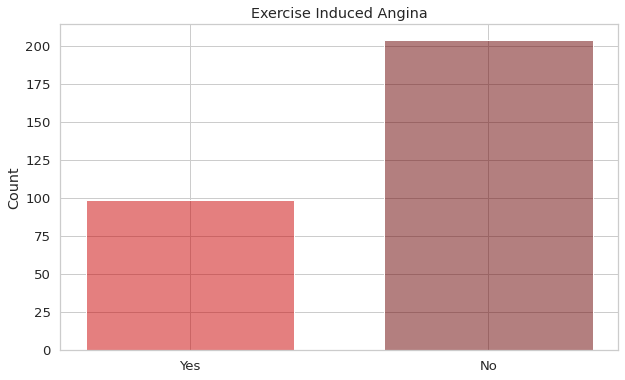

No     67.326733
Yes    32.673267
Name: exang, dtype: float64


In [14]:
# Exercise Induced Angina
aux = data.copy()
aux.loc[aux['exang'] == 0, 'exang'] = 'No'
aux.loc[aux['exang'] == 1, 'exang'] = 'Yes'

exercise_angina_plt = sns.histplot(
    data=aux,
    x='exang',
    hue='exang',
    legend=False,
    shrink=.7
)
exercise_angina_plt.set(title='Exercise Induced Angina', xlabel='')
exercise_angina_plt.invert_xaxis()
plt.show()

print((aux['exang'].value_counts()/len(aux['exang']))*100)

Cerca de um terço (32.6%) dos pacientes apresentaram angina durante o exercício.

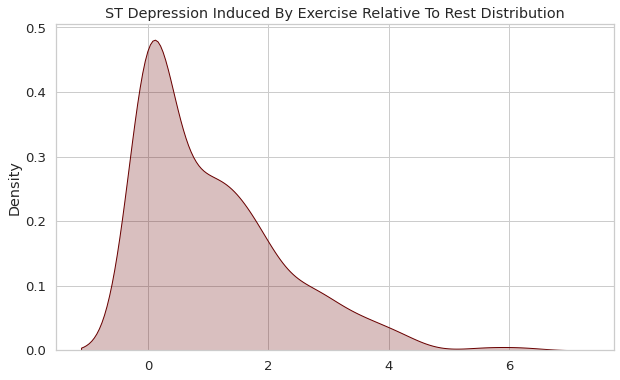

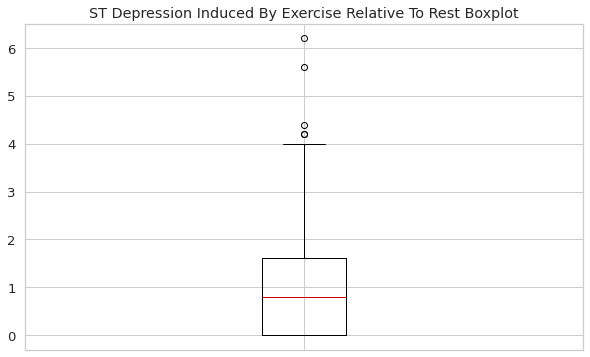

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


In [15]:
# ST Depression Induced By Exercise Relative To Rest
st_depression_plt = sns.kdeplot(
    data=data['oldpeak'],
    shade=True
)
st_depression_plt.set(title='ST Depression Induced By Exercise Relative To Rest Distribution', xlabel='')
plt.show()

plt.title("ST Depression Induced By Exercise Relative To Rest Boxplot")
plt.boxplot(data['oldpeak'], labels=[''])
plt.show()

print(data['oldpeak'].describe())

Segundo publicações (obtidas na *National Library of Medicine* - https://pubmed.ncbi.nlm.nih.gov), um alto valor nesta variável é uma manifestação comum de isquemia miocárdica. \
A variável possui alguns *outliers* no extremo superior. Dado a correlação afirmada nos estudos entre valores altos nesta variável e doenças cardíacas, mantém-se os *outliers*.

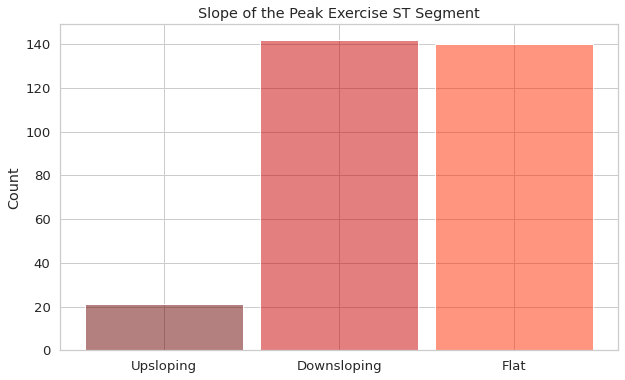

Downsloping    46.864686
Flat           46.204620
Upsloping       6.930693
Name: slope, dtype: float64


In [16]:
# Slope of the Peak Exercise ST Segment
aux = data.copy()
aux.loc[aux['slope'] == 0, 'slope'] = 'Upsloping'
aux.loc[aux['slope'] == 1, 'slope'] = 'Flat'
aux.loc[aux['slope'] == 2, 'slope'] = 'Downsloping'

slope_plt = sns.histplot(
    data=aux,
    x='slope',
    hue='slope',
    legend=False,
    shrink=.9
)
slope_plt.set(title='Slope of the Peak Exercise ST Segment', xlabel='')
plt.show()

print((aux['slope'].value_counts()/len(aux['slope']))*100)

Variável representa a morfologia do segmento ST no pico do esforço. A análise da morfologia do segmento ST é usada para identificar possíveis condições cardíacas. \
Na amostra, a maioria dos pacientes (46.9%) apresenta morfologia de descida (downsloping).

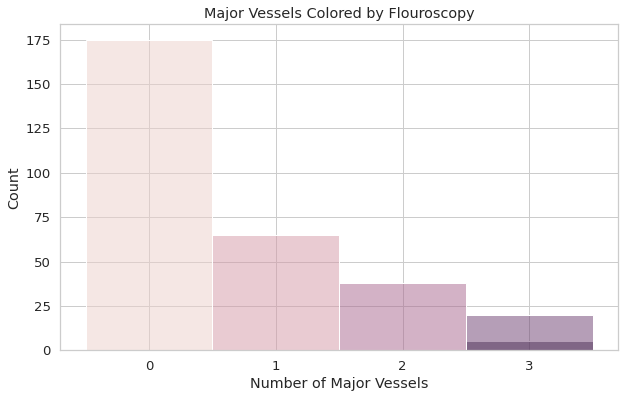

0    57.755776
1    21.452145
2    12.541254
3     6.600660
4     1.650165
Name: ca, dtype: float64


In [17]:
# Major Vessels Colored by Flouroscopy
contrast_agent_plt = sns.histplot(
    data=data,
    x='ca',
    hue='ca',
    legend=False,
    binwidth=1
)
contrast_agent_plt.set(title='Major Vessels Colored by Flouroscopy', xlabel='Number of Major Vessels')
contrast_agent_plt.set_xticks([0.5, 1.5, 2.5, 3.5])
contrast_agent_plt.set_xticklabels(['0', '1', '2', '3'])
plt.show()

print((data['ca'].value_counts()/len(data['ca']))*100)

Para a grande maioria dos pacientes (57.8%) o exame de fluoroscopia não coloriu nenhum dos principais vasos sanguíneos.

In [18]:
# Thallium Stress Test Results
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

A variável *thal*, referente ao resultado no teste de estresse, não se comporta como divulgado no dicionário do *data set*. Sem uma referência para compreender e fazer sentido dos valores apresentados, a recomendação é a remoção da variável.

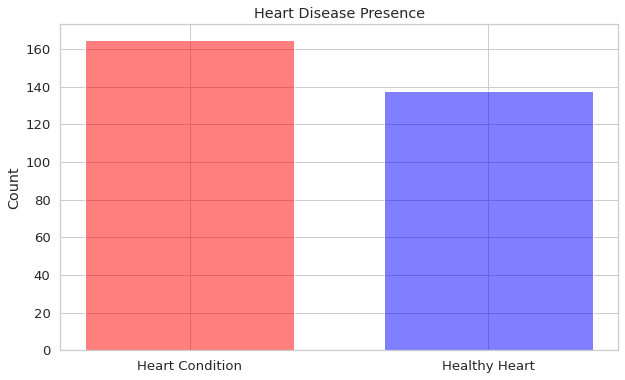

1    54.455446
0    45.544554
Name: target, dtype: float64


In [19]:
# Target (Presence of Heart Disease)
aux = data.copy()
aux.loc[aux['target'] == 0, 'target'] = 'Healthy Heart'
aux.loc[aux['target'] == 1, 'target'] = 'Heart Condition'

gender_plt = sns.histplot(
    data=aux,
    x='target',
    hue='target',
    palette=['r','b'],
    legend=False,
    shrink=.7
)
gender_plt.set(title='Heart Disease Presence', xlabel='')
plt.show()

print((data['target'].value_counts()/len(data['target']))*100)

O *data set* apresenta um pouco mais da metade (54.5%) de pacientes que possuem doenças cardíacas.

## Pré-processamento dos dados e *Feature Engineering*

### Remoção de variável

A variável *thal* não se comporta como esperado (segundo as informações providas pelo mantenedor do *data set*). Sendo inviável inferir significado aos valores apresentados na variável, dado a falta de informações, não faz sentido mantê-la no *data set*.

In [20]:
data = data.drop('thal', axis=1)

### *One-Hot Encoding*

In [21]:
# Change numerical categories to their respective names (most of the binary categories were left unchanged)
data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

data.loc[data['cp'] == 0, 'cp'] = 'typical_angina'
data.loc[data['cp'] == 1, 'cp'] = 'atypical_angina'
data.loc[data['cp'] == 2, 'cp'] = 'non-anginal'
data.loc[data['cp'] == 3, 'cp'] = 'asymptomatic'

data.loc[data['restecg'] == 0, 'restecg'] = 'normal'
data.loc[data['restecg'] == 1, 'restecg'] = 'ST-T_abnormality'
data.loc[data['restecg'] == 2, 'restecg'] = 'left_vent_hypertrophy'

data.loc[data['slope'] == 0, 'slope'] = 'upsloping'
data.loc[data['slope'] == 1, 'slope'] = 'flat'
data.loc[data['slope'] == 2, 'slope'] = 'downsloping'

# One hot encoding each variable
cat_to_encode = [
    'sex',
    'cp',
    'restecg',
    'slope'
]

one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)

for category in cat_to_encode:
    cat_encoded = one_hot_encoder.fit_transform(data[[category]])
    columns_encoded = category + '-' + one_hot_encoder.categories_[0]
    
    data = pd.concat([data, pd.DataFrame(cat_encoded, columns=columns_encoded)], axis=1)
    
    data = data.drop(category, axis=1)

data.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca',
       'target', 'sex-female', 'sex-male', 'cp-asymptomatic',
       'cp-atypical_angina', 'cp-non-anginal', 'cp-typical_angina',
       'restecg-ST-T_abnormality', 'restecg-left_vent_hypertrophy',
       'restecg-normal', 'slope-downsloping', 'slope-flat', 'slope-upsloping'],
      dtype='object')

## Análise Multivariada

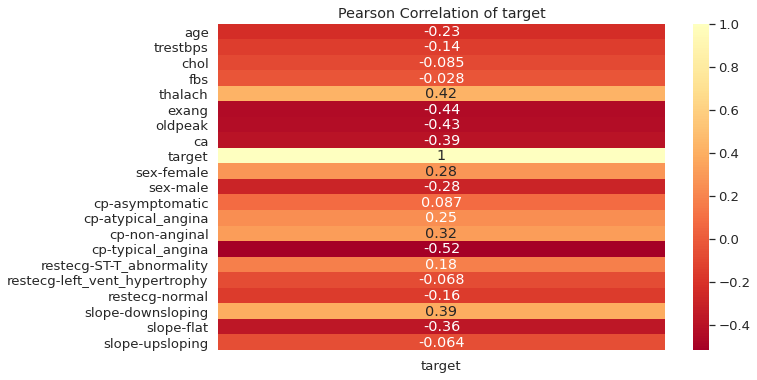

In [22]:
# Pearson Correlation
correlation_matrix = data.corr(method="pearson")

cor_plt = sns.heatmap(
    data=correlation_matrix[['target']], 
    center=True, 
    annot=True, 
    cmap="RdYlBu"
)
cor_plt.set(title='Pearson Correlation of target')
plt.show()

Nenhuma variável possui correlação linear particularmente forte (>= 0.6 ou <= -0.6) com a presença de doenças cardíacas. \
A maior correlação apresentada foi uma correlação linear negativa entre a presença de doenças cardíacas e dores no peito do tipo angina típica (correlação de Pearson de -0.52).

### Análise de Componentes Principais

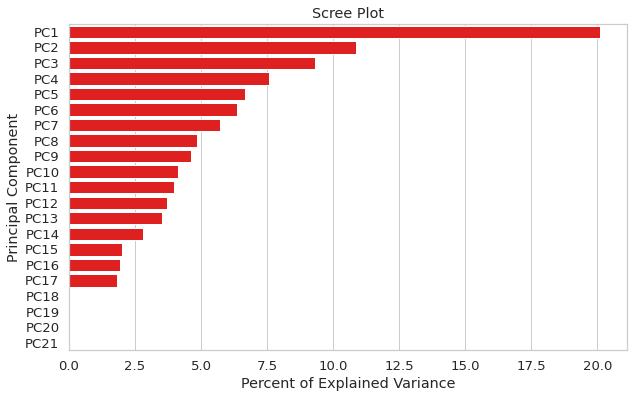

In [23]:
scaled_data = scale(data)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

scree_plt = sns.barplot(
    x=per_var,
    y=labels,
    color='r'
)
scree_plt.set(
    title='Scree Plot',
    xlabel='Percent of Explained Variance',
    ylabel='Principal Component'
)
plt.show()

In [24]:
important_vars = []
for i in range(8):
    loading_scores = pd.Series(pca.components_[i-1], index=data.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_5_var = sorted_loading_scores[:5].index.values

    for var in top_5_var:
        if var not in important_vars:
            important_vars.append(var)
important_vars

['cp-typical_angina',
 'cp-non-anginal',
 'cp-atypical_angina',
 'sex-male',
 'sex-female',
 'target',
 'slope-downsloping',
 'thalach',
 'oldpeak',
 'chol',
 'age',
 'restecg-ST-T_abnormality',
 'restecg-normal',
 'slope-flat',
 'cp-asymptomatic',
 'slope-upsloping',
 'trestbps',
 'ca',
 'fbs']

Portanto, a partir do estudo dos componentes principais, pode-se determinar as principais variáveis que descrevem os dados.

Aliado à observação das correlações de Pearson relacionadas à variável *target*, pode-se selecionar as variáveis que, associadas a esta, possuem potencial de prover maiores informações que expliquem a ocorrência de doenças cardíacas.

Foram selecionadas as seguintes variáveis:

- age
- sex
- cp
- restecg
- thalach
- exang
- oldpeak
- slope
- ca

### Visualizações Multivariadas

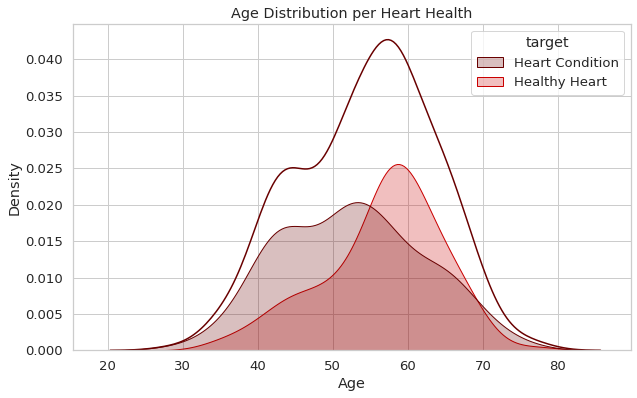

count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64


In [25]:
# Age x Heart Condition
aux = data.copy()
aux.loc[aux['target'] == 0, 'target'] = 'Healthy Heart'
aux.loc[aux['target'] == 1, 'target'] = 'Heart Condition'

age_target_plt = sns.kdeplot(
    data=aux,
    x='age',
    shade=True,
    hue='target'
)
sns.kdeplot(
    data=aux,
    x='age',
    shade=False
)
age_target_plt.set(
    title='Age Distribution per Heart Health',
    xlabel='Age'
)

plt.show()

print(data.loc[data['target'] == 1, 'age'].describe())

Entre os pacientes que apresentaram problemas cardíacos, a maioria encontra-se aproximadamente entre 40 e 65 anos (a partir da observação da distribuição, corroborado pelos quartis).

Pacientes mais novos que 55 anos, no *dataset*, se apresentaram, mais frequentemente, com presença de problemas cardíacos do que ausência. Uma possível explicação para tal é que pacientes desta faixa etária não fazem exames de *checkup* com a mesma frequência que os mais velhos e, portanto, quando investigam a saúde do coração é porque já apresentam sintomas e dificuldades.

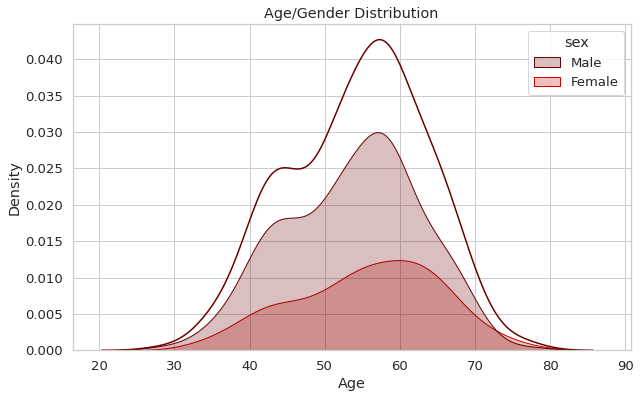

Age Descriptive Statistics For Male Patients

count    207.000000
mean      53.758454
std        8.883803
min       29.000000
25%       47.000000
50%       54.000000
75%       59.500000
max       77.000000
Name: age, dtype: float64


Age Descriptive Statistics For Female Patients

count    96.000000
mean     55.677083
std       9.409396
min      34.000000
25%      49.750000
50%      57.000000
75%      63.000000
max      76.000000
Name: age, dtype: float64


In [26]:
# Age x Gender
aux = data.copy()
aux.loc[aux['sex-male'] == 1, 'sex'] = 'Male'
aux.loc[aux['sex-female'] == 1, 'sex'] = 'Female'

age_target_plt = sns.kdeplot(
    data=aux,
    x='age',
    shade=True,
    hue='sex'
)
sns.kdeplot(
    data=aux,
    x='age',
    shade=False
)
age_target_plt.set(
    title='Age/Gender Distribution',
    xlabel='Age'
)

plt.show()

print('Age Descriptive Statistics For Male Patients\n')
print(data.loc[data['sex-male'] == 1, 'age'].describe())
print('\n')
print('Age Descriptive Statistics For Female Patients\n')
print(data.loc[data['sex-female'] == 1, 'age'].describe())

Existe pouca diferença (exceto na quantidade de pacientes) entre homens e mulheres no *dataset*.

50% dos pacientes homens se encontram entre 47 e 59 anos. O paciente homem mais novo possuia 29 anos. O mais velho 77.

50% das pacientes mulheres se encontram entre 49 e 63 anos. A paciente mulher mais nova possuia 34 anos. A mais velha 76.

As médias e medianas estão bem próximas também, sendo médias 53.8 (homens) e 55.7 (mulheres), e medianas 54 (homens) e 57 (mulheres).

Em todas estatísticas, mulheres apresentaram idade um pouco superior a dos pacientes homens presentes no *dataset*.

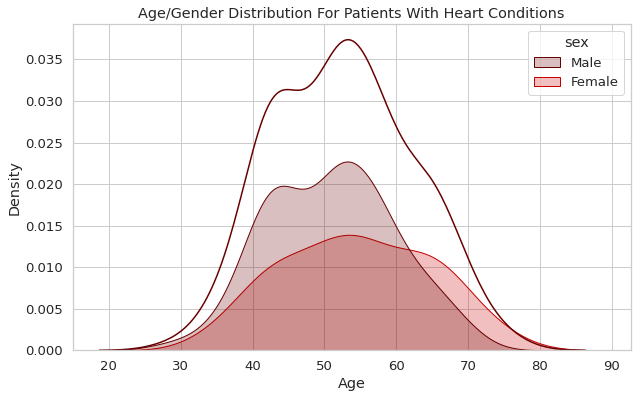

Age Descriptive Statistics For Male Patients With Heart Conditions

count    93.000000
mean     50.903226
std       8.682897
min      29.000000
25%      44.000000
50%      52.000000
75%      57.000000
max      70.000000
Name: age, dtype: float64


Age Descriptive Statistics For Female Patients With Heart Conditions

count    72.000000
mean     54.555556
std      10.265337
min      34.000000
25%      46.000000
50%      54.000000
75%      63.250000
max      76.000000
Name: age, dtype: float64


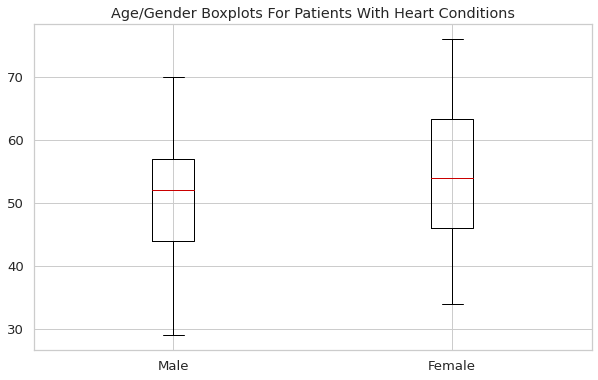

In [27]:
# Age x Gender for Patients with Heart Conditions
aux = data.copy()
aux = aux[aux['target'] == 1]
aux.loc[aux['sex-male'] == 1, 'sex'] = 'Male'
aux.loc[aux['sex-female'] == 1, 'sex'] = 'Female'

age_target_plt = sns.kdeplot(
    data=aux,
    x='age',
    shade=True,
    hue='sex'
)
sns.kdeplot(
    data=aux,
    x='age',
    shade=False
)
age_target_plt.set(
    title='Age/Gender Distribution For Patients With Heart Conditions',
    xlabel='Age'
)

plt.show()

print('Age Descriptive Statistics For Male Patients With Heart Conditions\n')
print(aux.loc[aux['sex-male'] == 1, 'age'].describe())
print('\n')
print('Age Descriptive Statistics For Female Patients With Heart Conditions\n')
print(aux.loc[aux['sex-female'] == 1, 'age'].describe())

plt.title("Age/Gender Boxplots For Patients With Heart Conditions")
plt.boxplot(
    [aux.loc[aux['sex-male'] == 1, 'age'],
    aux.loc[aux['sex-female'] == 1, 'age']], 
    labels=['Male', 'Female']
)
plt.show()

A idade de mulheres que apresentaram condições cardíacas possuem uma variância maior que a de homens (105.4 e 75.4, respectivamente).

De modo geral, homens apresentaram problemas cardíacos mais cedo, sendo que 75% o fizeram com idade menor ou igual a 57 anos e o paciente homem mais novo que apresentou condições cardíacas possuia 29 anos. O paciente homem mais velho que apresentou problemas possuia 70 anos.

Entre mulheres, 75% das que apresentaram problemas cardíacos possuiam idade inferior ou igual a 63 anos, com a mulher mais nova a apresentar problemas possuindo 34 anos. A mais velha possuia 76 anos.

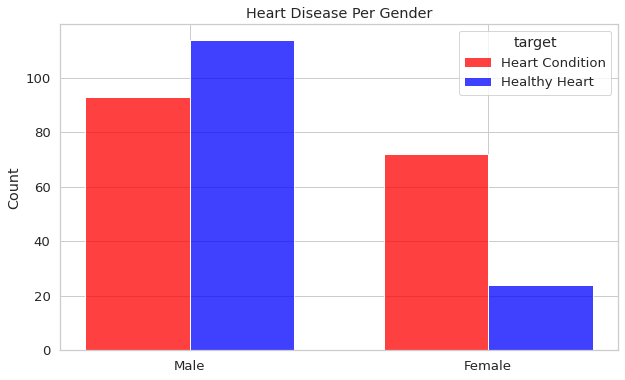

Male Heart Health Percents

Healthy Heart      55.072464
Heart Condition    44.927536
Name: target, dtype: float64

Female Heart Health Percents

Heart Condition    75.0
Healthy Heart      25.0
Name: target, dtype: float64


In [28]:
# Gender x Heart Condition
aux = data.copy()
aux.loc[aux['target'] == 0, 'target'] = 'Healthy Heart'
aux.loc[aux['target'] == 1, 'target'] = 'Heart Condition'
aux.loc[aux['sex-male'] == 1, 'sex'] = 'Male'
aux.loc[aux['sex-female'] == 1, 'sex'] = 'Female'

gender_plt = sns.histplot(
    data=aux,
    x='sex',
    hue='target',
    multiple='dodge',
    palette=['r','b'],
    shrink=.7
)
gender_plt.set(title='Heart Disease Per Gender', xlabel='')
plt.show()

print('Male Heart Health Percents\n')
print((aux.loc[aux['sex-male'] == 1, 'target'].value_counts()/len(data[data['sex-male'] == 1]))*100)
print('\nFemale Heart Health Percents\n')
print((aux.loc[aux['sex-female'] == 1, 'target'].value_counts()/len(data[data['sex-female'] == 1]))*100)

O percentual de mulheres que apresentaram problemas cardíacos é consideravelmente maior que o de pacientes homens (75% para mulheres, 45% para homens).

## Testes de Hipóteses

**TO-DO**

## Resumo

**TO-DO**